In [1]:
import cartopy
import cartopy.crs as ccrs
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import math
import requests
import numpy as np
from datetime import datetime, timedelta
from matplotlib.animation import FuncAnimation

C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env2\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
hubs = ['ALBE', 'ALDE', 'AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [3]:
def retrieve_ptdf(fromDate, toDate):
    data = {
        'fromUtc': f'{fromDate}T00:00:00.000Z',
        'toUtc': f'{toDate}T23:00:00.000Z',
    }

    try:
        response = requests.post('https://publicationtool.jao.eu/core/api/data/preFinalComputation', json=data)
        response.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(err)
   
    return pd.DataFrame(response.json()['data'])

In [4]:
df_grid = pd.read_excel('./grid_connected.xlsx', index_col=0)
df_substations = pd.read_excel('./substations.xlsx', index_col=0)
df_powerplants = pd.read_excel('./power_plants.xlsx', index_col=0)

In [58]:
#start = datetime(2023, 4, 13).strftime('%Y-%m-%d')
#end = datetime(2023, 4, 13).strftime('%Y-%m-%d')
start = datetime(2023, 4, 26).strftime('%Y-%m-%d')
end = datetime(2023, 4, 26).strftime('%Y-%m-%d')
hour = '14:00'
zone = 'NL'

df_ptdf = retrieve_ptdf(start, end)

df_ptdf = df_ptdf.rename(columns={
    'dateTimeUtc': 'DateTime'
})
df_ptdf = df_ptdf.set_index('DateTime')
df_ptdf.index = pd.to_datetime(df_ptdf.index)
df_ptdf = df_ptdf.tz_localize(None)

df_ptdf = df_ptdf[df_ptdf.cneEic != 'NA']
df_ptdf = df_ptdf[[
    'cneEic', 'ram', 'ptdf_ALBE', 'ptdf_ALDE', 'ptdf_AT', 'ptdf_BE', 'ptdf_CZ', 'ptdf_DE', 'ptdf_FR', 'ptdf_HR', 'ptdf_HU', 'ptdf_NL', 
    'ptdf_PL', 'ptdf_RO', 'ptdf_SI', 'ptdf_SK'
]]

df_ptdf.columns = ['eic', 'ram'] + hubs
df_ptdf_hour = df_ptdf.between_time(hour,hour)
display(df_ptdf_hour)

eic     ram     ALBE     ALDE       AT  \
DateTime                                                                   
2023-04-27 14:00:00  14T-220-0-00207Y   138.0  0.02277  0.02286  0.05472   
2023-04-27 14:00:00  10T-AT-HU-00002U   154.0  0.02686  0.02690  0.03597   
2023-04-27 14:00:00  10T-AT-HU-00002U   162.0  0.02810  0.02812  0.04002   
2023-04-27 14:00:00  10T-AT-HU-00001W   172.0  0.02784  0.02784  0.04170   
2023-04-27 14:00:00  10T-AT-HU-00001W   250.0 -0.02784 -0.02784 -0.04170   
...                               ...     ...      ...      ...      ...   
2023-04-27 14:00:00  10T-CZ-SK-00002W   872.0  0.21178  0.21482  0.13071   
2023-04-27 14:00:00  10T-CZ-SK-00002W   966.0  0.18973  0.19237  0.12374   
2023-04-27 14:00:00  24T-V429-0000005  1436.0  0.12539  0.12728  0.08479   
2023-04-27 14:00:00  24T-V425-0000004  1255.0  0.11137  0.11276  0.08394   
2023-04-27 14:00:00  24T-V425-0000004  1138.0  0.04458  0.04539  0.02265   

                          BE       CZ    DE_LU       FR       HR       HU  \
DateTime                                                                    
2023-04-27 14:00:00  0.02278  0.00990  0.02317  0.02268  0.00182 -0.00234   
2023-04-27 14:00:00  0.02686  0.02803  0.02708  0.02681  0.00999 -0.01753   
2023-04-27 14:00:00  0.02811  0.02901  0.02829  0.02812  0.01119 -0.01904   
2023-04-27 14:00:00  0.02786  0.02847  0.02800  0.02792  0.01172 -0.01946   
2023-04-27 14:00:00 -0.02786 -0.02847 -0.02800 -0.02792 -0.01172  0.01946   
...                      ...      ...      ...      ...      ...      ...   
2023-04-27 14:00:00  0.21066  0.20785  0.21661  0.20263  0.05111 -0.00937   
2023-04-27 14:00:00  0.18879  0.21107  0.19406  0.18197  0.04296 -0.02022   
2023-04-27 14:00:00  0.12476  0.17410  0.12860  0.12004  0.01550 -0.03782   
2023-04-27 14:00:00  0.11090  0.14807  0.11376  0.10745  0.02446 -0.02630   
2023-04-27 14:00:00  0.04429  0.04441  0.04586  0.04217  0.00394 -0.01476   

                          NL       PL       RO       SI       SK  
DateTime                                                          
2023-04-27 14:00:00  0.02265  0.00894 -0.00025  0.00377  0.00111  
2023-04-27 14:00:00  0.02681  0.01661 -0.00161  0.01849  0.00531  
2023-04-27 14:00:00  0.02803  0.01707 -0.00181  0.02067  0.00513  
2023-04-27 14:00:00  0.02776  0.01666 -0.00190  0.02162  0.00472  
2023-04-27 14:00:00 -0.02776 -0.01666  0.00190 -0.02162 -0.00472  
...                      ...      ...      ...      ...      ...  
2023-04-27 14:00:00  0.21508  0.35723 -0.00992  0.08032 -0.08991  
2023-04-27 14:00:00  0.19241  0.24157 -0.00788  0.07063 -0.11106  
2023-04-27 14:00:00  0.12713  0.14159 -0.00173  0.03428  0.24071  
2023-04-27 14:00:00  0.11263  0.11752 -0.00392  0.04349  0.21876  
2023-04-27 14:00:00  0.04545  0.08035 -0.00021  0.00969  0.19710  

[119 rows x 16 columns]

In [59]:
gdf_substations = gpd.GeoDataFrame(
    df_substations, geometry=gpd.points_from_xy(df_substations.lon, df_substations.lat))

for index, row in gdf_substations.iterrows():
    aggregated_capacity = df_powerplants[df_powerplants.node == index]['capacity'].agg('sum')
    gdf_substations.loc[index, 'aggregated_capacity'] = aggregated_capacity
    
for index, row in df_grid.iterrows():
    df_grid.loc[index, 'start_lon'] = df_substations.loc[row.substation_1, 'lon']
    df_grid.loc[index, 'start_lat'] = df_substations.loc[row.substation_1, 'lat']
    
    df_grid.loc[index, 'end_lon'] = df_substations.loc[row.substation_2, 'lon']
    df_grid.loc[index, 'end_lat'] = df_substations.loc[row.substation_2, 'lat']
    
# CNEs
for index, row in df_grid.iterrows():
    cne = df_ptdf_hour[df_ptdf_hour.eic == row['eic']]
    if len(cne) > 0:
        df_grid.loc[index, 'cne'] = True
        df_grid.loc[index, 'ram'] = cne.iloc[0]['ram']
        df_grid.loc[index, 'ptdf'] = cne.iloc[0][zone]
    else:
        df_grid.loc[index, 'cne'] = False
        df_grid.loc[index, 'ram'] = 0
        df_grid.loc[index, 'ptdf'] = 0
    
gdf_grid = gpd.GeoDataFrame(
    df_grid, geometry=gpd.points_from_xy(df_grid.start_lon, df_grid.start_lat), crs=4326)

for index, row in gdf_grid.iterrows():
    gdf_grid.loc[index, 'geometry'] = LineString([(row.start_lon, row.start_lat), (row.end_lon, row.end_lat)])
    
gdf_grid = gdf_grid.drop(columns=['start_lon', 'end_lon', 'start_lat', 'end_lat'])
gdf_substations = gdf_substations.drop(columns=['lon', 'lat'])

gdf_network = pd.concat([gdf_substations, gdf_grid])

C:\Users\balaz\SoftwareDeveloping\TUD\thesis\FBMC\fbmc_env2\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\balaz\AppData\Local\Temp\ipykernel_23488\4133046199.py:36: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  gdf_network = pd.concat([gdf_substations, gdf_grid])


In [60]:
def ptdf_colormap_today(ptdf):  # scalar value defined in 'column'
    cmap = matplotlib.cm.get_cmap('bwr')
    return matplotlib.colors.to_hex(cmap((ptdf - df_ptdf_hour[zone].min())/(df_ptdf_hour[zone].max() - df_ptdf_hour[zone].min())))
   
    
style_function = lambda x: {
    "color": ptdf_colormap_today(x["properties"]["ptdf"])
    if x["properties"]["cne"] == True
    else "#999999",
    "weight": x["properties"]["ram"]/df_ptdf_hour.ram.max()*10
    if x["properties"]["cne"] == True
    else 1,
}
    
gdf_network.explore(
    style_kwds=dict(style_function=style_function)
)

C:\Users\balazs.riskutia\FBMC\fbmc_geo_env\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


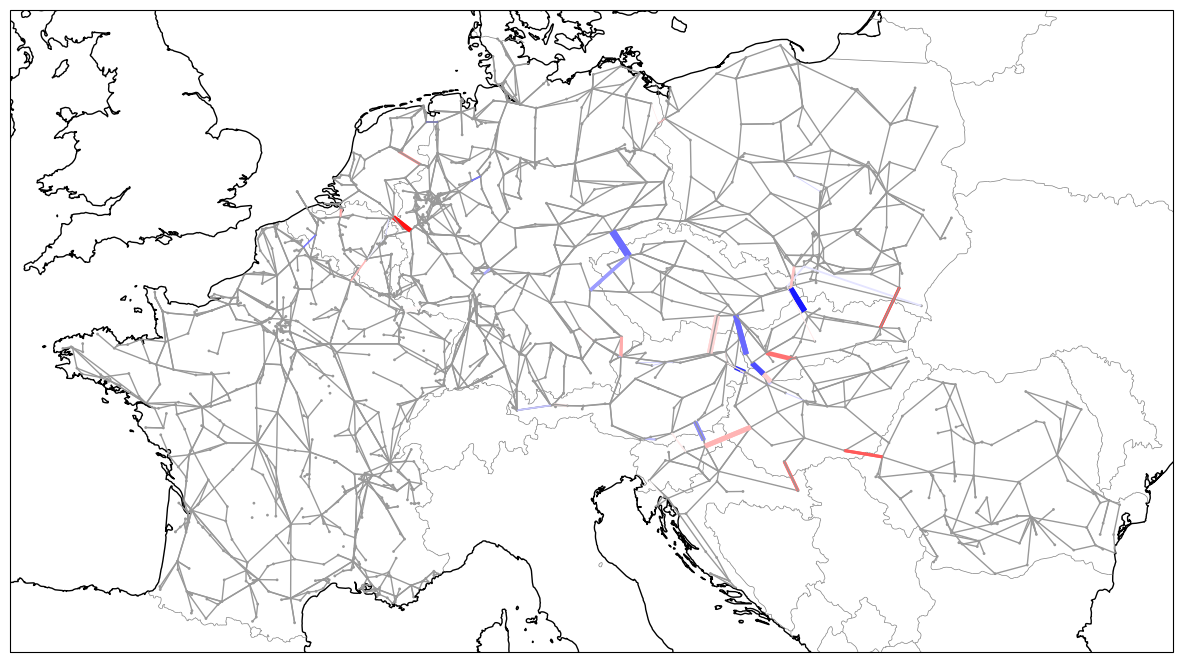

In [147]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())

def df_colormap_function(x):
    return ptdf_colormap_today(x.ptdf) if x.cne == True else "#999"

def df_linewidth_function(x):
    return (x.ram/df_ptdf_hour.ram.max()*5) if x.cne == True else 1

df_colormap = gdf_network.apply(lambda x: df_colormap_function(x), axis=1)
df_linewidth = df_grid.apply(lambda x: df_linewidth_function(x), axis=1)

gdf_network.plot(
    ax=ax,
    color=df_colormap,
    markersize=1,
    linewidth=df_linewidth
)

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)

In [152]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
    
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()